<a href="https://colab.research.google.com/github/pranjali-sharma/CLA2/blob/master/COMS3251_Lab3_Dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMS 3251 CLA Lab 3: COVID-19



---

Pranjali Sharma, ps3072

*We realize that the subject of this lab is an ongoing global pandemic and the source of much stress in many people's current lives. However, as future Columbia graduates, many of you will be in leadership and managment positions that will require confronting unpleasant situations head on in order to find solutions to ultimately help society. This lab will ask you to analyze the trends of real-time data tracking the ongoing crisis.*

# Importing the Data Set

The Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) has been tracking and regularly updating a repository of globally known cases, deaths, and recoveries from the ongoing COVID-19 pandemic. It is accessible from a public GitHub repo [here](https://github.com/CSSEGISandData/COVID-19). Daily case reports and time series data are stored in /csse_covid_19_data/. WHO situation reports are also available in /who_covid_19_situation_reports/.

Download the `time_series_covid19_confirmed_global.csv` file provided to you with this assignment **(not from the repo above... yet)**. This includes all case numbers up to March 26. Once you have the data stored locally, upload it to Jupyter Notebook by clicking the folder icon on the sidebar and clicking "Upload" (you'll have to do this every time you start a new session). Then run the code below to import the data.

In [0]:
### RUN THIS FIRST TO IMPORT DATA ###

import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

ts = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
data = ts.values

# n is number of days for which we have data on case numbers
# First four fields of each row in csv file are geographical metadata
n = np.size(data,1) - 4

# t will be the horizontal axis for many of the following time series plots
t = np.arange(n)

# CHINA
Let's look at how COVID-19 evolved in China, where the first cases of the virus were reported. We're going to look at the trajectory of cases in Hubei province, as well as the country of China as a whole, over time. 

## Problem 1a (10 points)
Use the [`numpy.where`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) function to find the row index of the Hubei data, as well as all the row indices for each Chinese province. Sum up all of the China rows data ([`numpy.sum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)) into a single-row array. Then plot a scatter plot overlaid with both the Hubei and cumulative China data. Please also include a[ legend ](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html) in your plot to differentiate the two data sets.

*Hint: The first four columns are geographical metadata, so you'll want to start plotting data from the fifth column onward.*

It should look similar to this:

<img src="http://jakehlee.com/cla-s2020/china.png">

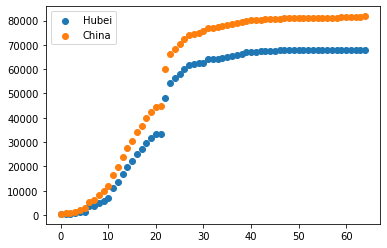

In [0]:
# 1a CODE GOES HERE #

result=np.where(data=="China")
#print("Row #s of China= ",result[0])
begin=result[0][0]
end=result[0][-1]


China= data[begin:end+1].sum(0)
China=China[4:]
#print("Sum of all China rows= ",China) 

HubeiResult=np.where(data=="Hubei")
#print("Hubei row # = ",HubeiResult[0])
Hubei=data[HubeiResult[0]][0]
Hubei=Hubei[4:]
HubeiScatter=plt.scatter(t, Hubei)

ChinaScatter=plt.scatter(t, China)
plt.legend((HubeiScatter, ChinaScatter), ("Hubei","China"))


# DO NOT MODIFY #
plt.show()

## Problem 1b (10 points)
As you can hopefully see from your output, China's reported data shows that they managed to flatten their curves. Let's use linear regression to fit functions to each of them. The data itself is obviously non-linear, so a good alternative would be to try polynomial basis functions:
$$ \{1, x, x^2, \ldots\} $$

Follow the example from **lecture 13** and try a number of polynomial fits with different degrees. Settle on a minimal polynomial degree that fits reasonably well for both the Hubei and China data sets. Plot the scatter plot from above again, and overlay the two fits on top of them in different colors.

*Note: If you get a type casting error, you may have to cast your numpy array data as a float type. For example, if `x` is your array, you can cast it by replacing it with `np.array(x, dtype='float')`.*

65


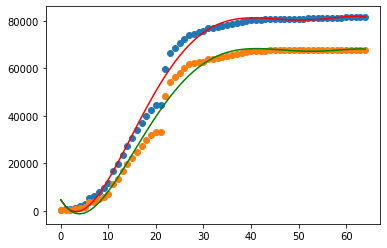

In [0]:
# 1b CODE GOES HERE #
n = len(China)
# Form the design matrix with column of 1s and column of data
X = np.column_stack((np.ones(n), np.arange(n), np.power(np.arange(n),2), np.power(np.arange(n),3), np.power(np.arange(n),4),  np.power(np.arange(n),5) ))
#print("X =", X)

# Solve the least squares problem
sol = npl.lstsq(np.array(X, dtype='float'), np.array(China, dtype='float'), rcond=None)
#print(sol)
beta = sol[0]
SSE = sol[1]

# Overlay trend line on data
plt.scatter(np.arange(n), China)
plt.plot(np.arange(n), X @ beta, 'r')
#print("beta China =", beta)
#print("RMS China = ", np.sqrt(SSE/n))

# Residual vector can be interpreted as de-trended time series
#plt.scatter(np.arange(n), China - X @ beta)

m = len(Hubei)
print(m)
# Form the design matrix with column of 1s and column of data
X_H= np.column_stack((np.ones(m), np.arange(m), np.power(np.arange(m),2), np.power(np.arange(m),3), np.power(np.arange(m),4),  np.power(np.arange(m),5) ))
#print("X =", X)

# Solve the least squares problem
sol_H = npl.lstsq(np.array(X_H, dtype='float'), np.array(Hubei, dtype='float'), rcond=None)
#print(sol)
beta_H = sol_H[0]
SSE_H = sol_H[1]

# Overlay trend line on data
plt.scatter(np.arange(m), Hubei)
plt.plot(np.arange(m), X_H @ beta_H, 'g')
#print("beta Hubei =", beta_H)
#print("RMS Hubei = ", np.sqrt(SSE_H/m))

# DO NOT MODIFY #
plt.show()

## Problem 1c (5 points)
Do you think your polynomial fits would be suitable for prediction? In other words, if you extrapolate the fits into the future (say 10 days or 30 days), would the predicted number of cases be realistic? Explain why or why not.


Not the best fit for prediction. If this fit is extrapolated into the future, the predicted number of cases will not be realistic. The fit found by using this method is not very accurate and if extrapolated for future use, it will not give realistic results.

# SOUTH KOREA

Let's now look at South Korea, which acted quickly and prevented the outbreak from growing uncontrolled. 

## Problem 2a (5 points)
Start off by making a scatter plot of the COVID-19 cases over time just like you did with the China data. The label is "Korea, South", which you'll use in the `where` function.

It should look similar to this:

<img src="http://jakehlee.com/cla-s2020/korea.png">

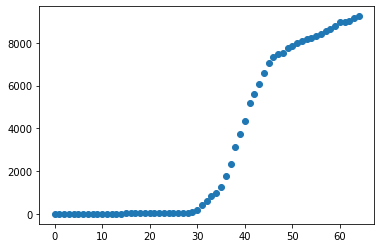

In [0]:
# 2a CODE GOES HERE #
SKResult=np.where(data=="Korea, South")
SK=data[SKResult[0]][0]
SK=SK[4:]

SKScatter=plt.scatter(t, SK)

# DO NOT MODIFY #
plt.show()

## Problem 2b (10 points)
We saw that a polynomial fits reasonably well on the China data, but it was not the best fit for prediction. A more flexible model would be an auto-regressive model, which explicitly uses past data to make future predictions: 

$$ \hat z_{t+1} = \theta_1 z_t + ... + \theta_M z_{t-M+1} $$

Recall that $M$ denotes the memory length of the model; e.g., if $M=1$ then $\hat z_{t+1} = \theta_1 z_t$. Follow the example from lecture 13 to construct the design matrix $X$ for $M=16$ (avoid the manual method, as you'll try different values of $M$ after this), and then use linear regression to learn the $\theta_i$ parameters. Display the regression fit on top of the scatter plot in a different color.

beta = [ 0.14889453 -0.2418623  -0.02400417 -0.01694065  0.13704736  0.10499793
  0.15724235 -0.46116734  0.26317728  0.08003825 -0.22261246  0.21547611
 -0.40507472  0.03398181 -0.45627384  1.68790632]
RMS =  [96.09306385]


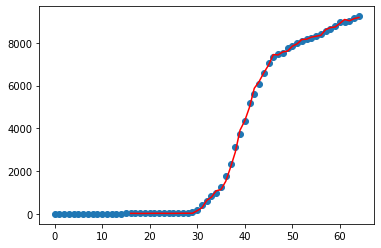

In [0]:
# 2b CODE GOES HERE #
M=16
N=len(SK)
y=SK[M:]

idx,_ = np.mgrid[0:N-M, 0:M] + np.arange(0,M)
X = SK[idx]

sol = npl.lstsq(np.array(X, dtype='float'), np.array(y,dtype='float'), rcond=None)
beta = sol[0]
SSE = sol[1]

plt.scatter(np.arange(N), SK)
plt.plot(np.arange(M,N), X @ beta, 'r')
print("beta =", beta)
print("RMS = ", np.sqrt(SSE/len(y)))


# DO NOT MODIFY #
plt.show()

## Problem 2c (10 points)
Let's now use our learned auto-regressive model to perform prediction for the next 15 days in South Korea. Write code below to predict the number of cases for each of the next 15 days past the data in the data set. When you are finished, plot all past and future predictions on one fitted line (no need to overlay the scatter plot again here).

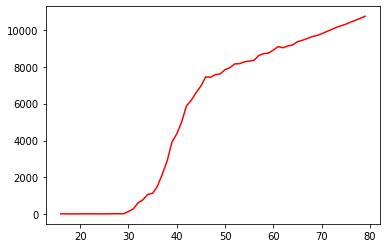

In [0]:
# 2c CODE GOES HERE #
SK1=np.array(SK)
N=len(SK1)
y=SK1[M:]

idx,_ = np.mgrid[0:N+15-M, 0:M] + np.arange(0,M)


#sol = npl.lstsq(np.array(X, dtype='float'), np.array(y,dtype='float'), rcond=None)
beta = sol[0]

zhat= np.zeros(16)

 # print(i)
 # print((beta[i]))
 # print((X[len(X)-1-i]))
for i in range(0,15):
  theta_z=beta@SK1[idx[i+N-M]]
  SK1=np.append(SK1,[theta_z])
  # X=np.vstack([X, theta_z])
  # row_idx=idx[i+N-M]
 # print(theta_z)

X = SK1[idx]
plt.plot(np.arange(M,N+15), X@beta, 'r')

# DO NOT MODIFY #
plt.show()

## Problem 2d (5 points)
Briefly describe the nature of the case trajectory in the future. Is the number of cases in South Korea predicted to rise, fall, or remain about the same? Now go back and run the above two segments of code for different values of $M$, both smaller and larger than 16 (you don't need to show the results of these). Describe how the choice of this parameter can affect future predictions.

The trajectory seems to rise with a gentle slope. This means that the number of cases is expected to rise in South Korea. Smaller M makes the results dependent only on the very latest values, making it more independent and unpredictable. Having larger M values makes the predictions more dependent on previous values and less independent.

# ITALY

After China peaked, Italy was the next hardest-hit country in numbers of cases and deaths.

## Problem 3a (5 points)
Start again by making a scatter plot of Italy's case trajectory.

It should look similar to this:

<img src="http://jakehlee.com/cla-s2020/italy.png">

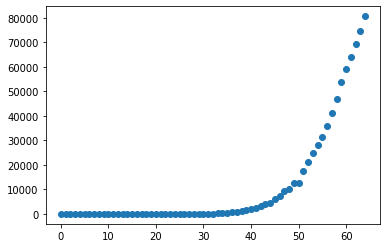

In [0]:
# 3a CODE GOES HERE #
ItalyResult=np.where(data=="Italy")
Italy=data[ItalyResult[0]][0]
Italy=Italy[4:]

ItalyScatter=plt.scatter(t, Italy)
# DO NOT MODIFY #
plt.show()

## Problem 3b (10 points)
The number of cases clearly follows an exponential growth. From the data alone though, it's hard to identify what the rate of growth should be. So let's again try a polynomial basis--the reason that this can substitute for an exponential basis function is because the Taylor expansion of an exponential function consists of a sum of polynomials. So as long as we have enough polynomial functions, an exponential can be approximated reasonably well:

$$ \hat f(x) = \beta \exp(cx) = \sum_{i=0}^\infty \beta_i x^i $$

Use linear regression to fit polynomial basis functions up to $x^6$. Your code here should be very similar to what you wrote for the China data. In addition to overlaying the fit on top of the data, show what the root-mean-square (RMS) error is, as well as the beta coefficients.

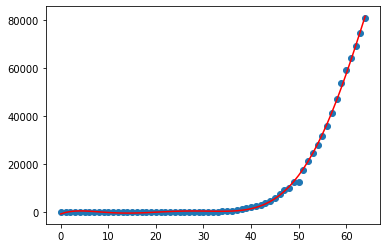

The RMS error of the fit is [625.1167907]
The beta coefficients are [-7.58111058e+02  7.35828843e+02 -1.43810646e+02  1.07188477e+01
 -3.63018553e-01  5.55763031e-03 -3.00168637e-05]


In [0]:
# 3b CODE GOES HERE #
n = len(Italy)
# Form the design matrix with column of 1s and column of data
X = np.column_stack((np.ones(n), np.arange(n), np.power(np.arange(n),2), np.power(np.arange(n),3), np.power(np.arange(n),4),  np.power(np.arange(n),5), np.power(np.arange(n),6) ))
#print("X =", X)

# Solve the least squares problem
sol = npl.lstsq(np.array(X, dtype='float'), np.array(Italy, dtype='float'), rcond=None)
#print(sol)
beta = sol[0]
SSE = sol[1]

# Overlay trend line on data
plt.scatter(np.arange(n), Italy)
plt.plot(np.arange(n), X @ beta, 'r')


# ASSIGN THESE VARIABLES #
RMS = np.sqrt(SSE/n)
beta = beta

# DO NOT MODIFY #
plt.show()
print("The RMS error of the fit is", RMS)
print("The beta coefficients are", beta)


## Problem 3c (10 points)
Now examine the $\beta$ coefficients, as well as the root-mean-square (RMS error) obtained from the regression. You should see that the coefficients generally become smaller at the higher powers, which means that dropping them would not significantly worsen the quality of the fit. At the same time, dropping higher-order terms lowers our model complexity and helps avoid overfitting. 

Re-fit the Italy data with a reasonably simplified model (you determine how many higher-order terms to drop), overlay the new fit on the data, and find the RMS error of the new fit, as well as the new beta coefficients.

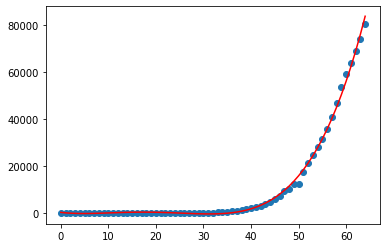

The RMS error of the reduced fit is [960.76396151]
The beta coefficients are [ 2.49016000e+02 -2.31199110e+02  3.42268064e+01 -1.56800355e+00
  2.20144983e-02]


In [0]:
# 3c CODE GOES HERE #

n = len(Italy)
# Form the design matrix with column of 1s and column of data
X = np.column_stack((np.ones(n), np.arange(n), np.power(np.arange(n),2), np.power(np.arange(n),3), np.power(np.arange(n),4)))
#print("X =", X)

# Solve the least squares problem
sol = npl.lstsq(np.array(X, dtype='float'), np.array(Italy, dtype='float'), rcond=None)
#print(sol)
beta = sol[0]
SSE = sol[1]

# Overlay trend line on data
plt.scatter(np.arange(n), Italy)
plt.plot(np.arange(n), X @ beta, 'r')


# ASSIGN THESE VARIABLES #
new_RMS = np.sqrt(SSE/n)
beta = beta

# DO NOT MODIFY #
plt.show()
print("The RMS error of the reduced fit is", new_RMS)
print("The beta coefficients are", beta)

# UNITED STATES

As of the writing of this lab, the United States now leads the world in number of cases. 

## Problem 4a (10 points)
As with the other countries, make a scatter plot of the case trajectory in the US (identifier is simply "US" in the original data set). Also perform a linear regression with polynomial basis functions and overlay the resulting fit. As with Italy in 3b, use basis functions up to $x^6$. Show the RMS error and beta coefficients.

The scatterplot alone should look like this. Your output should have the linear regression overlayed on top of this plot.

<img src="http://jakehlee.com/cla-s2020/usa.png">

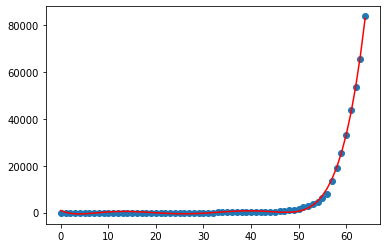

The RMS error of the reduced fit is [616.38470621]
The beta coefficients are [ 8.86625817e+02 -9.21542714e+02  1.91991154e+02 -1.52968611e+01
  5.60124844e-01 -9.52658030e-03  6.10666060e-05]


In [0]:
# 4a CODE GOES HERE #

USResult=np.where(data=="US")
US=data[USResult[0]][0]
US=US[4:]

n = len(US)
# Form the design matrix with column of 1s and column of data
X = np.column_stack((np.ones(n), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5), np.power(t,6)))
#print("X =", X)

# Solve the least squares problem
sol = npl.lstsq(np.array(X, dtype='float'), np.array(US, dtype='float'), rcond=None)
#print(sol)
beta = sol[0]
SSE = sol[1]

# Overlay trend line on data
plt.scatter(t, US)
plt.plot(t, X @ beta, 'r')

# ASSIGN THESE VARIABLES 
RMS = np.sqrt(SSE/n)
beta = beta

# DO NOT MODIFY #
plt.show()
print("The RMS error of the reduced fit is", RMS)
print("The beta coefficients are", beta)

## Problem 4b (5 points)
Compare the beta coefficients for Italy and the US. Specifically, compare the magnitudes of the first coefficients, the magnitudes of the second coefficients, and so on. What is the general pattern that you see? How do your observations explain the difference in exponential growth rates between the two countries?


The magnitudes of all the coefficients for the Italy and US data are the in the same order. The coefficients are different. This shows that there is not much difference in the exponential growth rates between the two countries.

# Problem 5 (5 points)
The global situation is changing day by day, and the data will likely look very different for many countries by the time you actually turn in the lab. For this last part, **you may do this any time after April 6** (a week before the deadline). If you finish the lab before then, just hold onto it until after 
April 6.
1.   Make a copy of this Jupyter notebook. You will still be turning this one in, but you'll be running the copy and then recording your observations here.
2.   Download the latest data from the JHU CSSE repo. The file is located [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) and has the same name as the one we originally provided you.
3.  **In the copy of this notebook**, upload the latest data file and re-run all code cells without making any changes. Again, no need to turn this in.

Record on which day you downloaded the data. Compare and contrast the results that you see from applying the same models you found here on the latest data. What still works and what doesn't? Which predictions did or did not pan out correctly? What does this tell you about the challenges of analysis and decision-making during a rapidly changing global situation?




4/14/20. The models of all four countries have only seen an increase in cases. Some models don't fit as they were fitting earlier. But it only take a change in one dimension to improve the fit. There was only one prediction in part 2c which was quite accurate. In a rapidly changing global situation, computer scientists can attempt to predict the future progressions with some accuracy. But getting a 100% accurate model is difficult given several evolving parameters. Several other challenges like this are faced world over during such a situation.